# Stock market prediction and forcasting using stacked LSTM 

In [16]:
###keras and tensor flow
### LSTM stack

In [17]:
### installing or checking the lirary (Tensor Flow)
!pip install tensorflow

In [18]:
### data collection 
import pandas_datareader as pdr
key="ed624531c9e759037119c42942763601ff925d8d"

In [19]:
###Api key for the data of stock 
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [20]:
### this will be saving the perticular file in .csv
df.to_csv('AAPL.csv')
### exucution succescful

In [21]:
###import panda 
import pandas as pd

In [22]:
###.csv 
df=pd.read_csv('AAPL.csv')

In [24]:
### it will just show how dataset looks like
df.head()
### the head will indicate the dates from which the data got collected 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-13 00:00:00+00:00,112.04,112.34,110.80,110.80,33257316,26.047814,26.117560,25.759530,25.759530,133029264,0.0,1.0
1,AAPL,2016-04-14 00:00:00+00:00,112.10,112.39,111.33,111.62,25473923,26.061763,26.129184,25.882748,25.950169,101895692,0.0,1.0
2,AAPL,2016-04-15 00:00:00+00:00,109.85,112.30,109.73,112.11,46938969,25.538668,26.108260,25.510770,26.064088,187755876,0.0,1.0
3,AAPL,2016-04-18 00:00:00+00:00,107.48,108.95,106.94,108.89,60821461,24.987674,25.329430,24.862132,25.315481,243285844,0.0,1.0
4,AAPL,2016-04-19 00:00:00+00:00,106.91,108.00,106.23,107.88,32384879,24.855157,25.108568,24.697066,25.080669,129539516,0.0,1.0


In [26]:
###the tail will show the data till the date 

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-05 00:00:00+00:00,125.900,126.1601,123.07,123.87,88651175,125.900,126.1601,123.07,123.87,88651175,0.0,1.0
1253,AAPL,2021-04-06 00:00:00+00:00,126.210,127.1300,125.65,126.50,80171253,126.210,127.1300,125.65,126.50,80171253,0.0,1.0
1254,AAPL,2021-04-07 00:00:00+00:00,127.900,127.9200,125.14,125.83,83466716,127.900,127.9200,125.14,125.83,83466716,0.0,1.0
1255,AAPL,2021-04-08 00:00:00+00:00,130.360,130.3900,128.52,128.95,88844591,130.360,130.3900,128.52,128.95,88844591,0.0,1.0
1256,AAPL,2021-04-09 00:00:00+00:00,132.995,133.0400,129.47,129.80,106686703,132.995,133.0400,129.47,129.80,106686703,0.0,1.0


In [27]:
###we will be predicting the data for this Close's column

df1=df.reset_index()['close']

In [28]:
###Execution
df1

0       112.040
1       112.100
2       109.850
3       107.480
4       106.910
         ...   
1252    125.900
1253    126.210
1254    127.900
1255    130.360
1256    132.995
Name: close, Length: 1257, dtype: float64

In [29]:
###Installation
!pip install matplotlib
###library already installed so the requirement is satisfied..

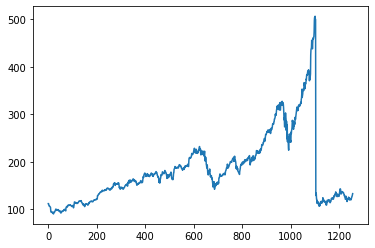

In [30]:
###importing matplotlib
import matplotlib.pyplot as plt
33plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [31]:
! pip install numpy

In [32]:
import numpy as np

In [33]:
df1

0       112.040
1       112.100
2       109.850
3       107.480
4       106.910
         ...   
1252    125.900
1253    126.210
1254    127.900
1255    130.360
1256    132.995
Name: close, Length: 1257, dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
!pip install scikit-learn

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
print(df1)

[[0.05219483]
 [0.05233915]
 [0.04692724]
 ...
 [0.09034275]
 [0.09625977]
 [0.10259771]]


In [38]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [39]:
training_size,test_size

(817, 440)

In [40]:
###this will show the array for the train data
train_data

array([[0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.011

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [44]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [45]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
###LSTM model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 11s 323ms/step - loss: 0.0194 - val_loss: 0.0422
Epoch 2/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0027 - val_loss: 0.0261
Epoch 3/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0016 - val_loss: 0.0219
Epoch 4/100
12/12 [==============================] - 2s 161ms/step - loss: 5.7068e-04 - val_loss: 0.0207
Epoch 5/100
12/12 [==============================] - 2s 170ms/step - loss: 4.0847e-04 - val_loss: 0.0203
Epoch 6/100
12/12 [==============================] - 2s 173ms/step - loss: 4.0952e-04 - val_loss: 0.0186
Epoch 7/100
12/12 [==============================] - 2s 159ms/step - loss: 3.5163e-04 - val_loss: 0.0186
Epoch 8/100
12/12 [==============================] - 2s 159ms/step - loss: 3.5654e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 2s 169ms/step - loss: 3.3965e-04 - val_loss: 0.0175
Epoch 10/100
12/12 [==============================] - 2s 166ms/ste

12/12 [==============================] - 2s 161ms/step - loss: 1.5309e-04 - val_loss: 0.0081
Epoch 79/100
12/12 [==============================] - 2s 154ms/step - loss: 1.3491e-04 - val_loss: 0.0077
Epoch 80/100
12/12 [==============================] - 2s 159ms/step - loss: 1.2425e-04 - val_loss: 0.0078
Epoch 81/100
12/12 [==============================] - 2s 157ms/step - loss: 1.3329e-04 - val_loss: 0.0078
Epoch 82/100
12/12 [==============================] - 2s 155ms/step - loss: 1.1973e-04 - val_loss: 0.0077
Epoch 83/100
12/12 [==============================] - 2s 160ms/step - loss: 1.2437e-04 - val_loss: 0.0083
Epoch 84/100
12/12 [==============================] - 2s 155ms/step - loss: 1.3837e-04 - val_loss: 0.0075
Epoch 85/100
12/12 [==============================] - 2s 151ms/step - loss: 1.3145e-04 - val_loss: 0.0075
Epoch 86/100
12/12 [==============================] - 2s 155ms/step - loss: 1.3873e-04 - val_loss: 0.0075
Epoch 87/100
12/12 [==============================] - 2s 15

In [51]:
import tensorflow as tf

In [52]:
tf.__version__

'2.5.0-rc0'

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.010073434162205585

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.08183862708404649

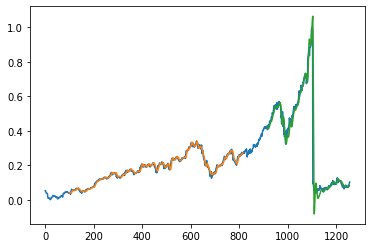

In [57]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:

len(test_data)

440

In [59]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08800971]
100
1 day input [0.06987372 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339
 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155
 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673 0.10032471
 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438
 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028
 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596
 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585
 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532
 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575 0.0713169
 0.07949489 0.07745039 0.07155743 0.

8 day output [[0.09459446]]
9 day input [0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474
 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752
 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822
 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824
 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443
 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431
 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219
 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646
 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806
 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039
 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233
 0.07855683 0.08553217

17 day output [[0.0959558]]
18 day input [0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007 0.07425135
 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781
 0.09034275 0.09625977 0.10259771 0.08800971 0.09117591 0.09324078
 0.0943526  0.09481195 

25 day output [[0.09893856]]
26 day input [0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.08800971 0.09117591 0.09324078 0.0943526  0.09481195
 0.09490056 0.09482149 0.09469803 0.09459446 0.09453884 0.09454034
 0.09459966 0.0947141 

In [63]:
day_new=np.arange(1,100)
day_pred=np.arange(100,130)

In [64]:
import matplotlib.pyplot as plt

In [65]:

len(df1)

1257

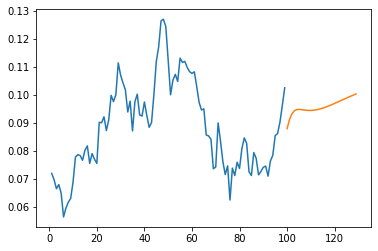

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

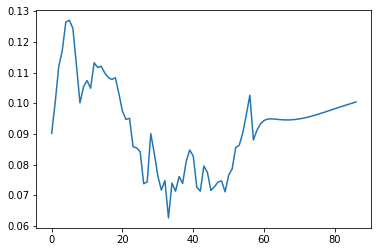

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

NameError: name 's' is not defined